In [9]:
import rpy2.robjects as robjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from common_tools import r_import_tool as r_in
from common_tools import plotting_tools as ploto
from common_tools import plotting_multivar as plotmulti


Load the RData file with raw data, models and modeldata, and convert to pandas format

In [22]:
robjects.r['load']('./data/data_r_in_num.RData')

d_in = r_in.import_rdata('d_in',0,'surveydata')
d_in_s = r_in.import_rdata('d_in_s',0,'surveydata_standardised')

In [24]:
# Load models
robjects.r['load']('./data/modeldata_real_out.RData')

model_m1 = r_in.import_rdata('data_m1',1,'m1')
model_m1_eq = r_in.import_rdata('data_m1_eq',1,'m1')
model_mrq1a = r_in.import_rdata('data_mrq1a',1,'mrq1a')
model_mrq1b = r_in.import_rdata('data_mrq1b',1,'mrq1b')
model_mequality_new = r_in.import_rdata('data_mequality_new',1,'mteach_new')

# Load model data
robjects.r['load']('./data/model_real_out.RData')

data_m1 = r_in.import_rdata('data_m1',1,'m1')
data_m1_eq = r_in.import_rdata('data_m1_eq',1,'m1')
data_mrq1a = r_in.import_rdata('data_mrq1a',1,'mrq1a')
data_mrq1b = r_in.import_rdata('data_mrq1b',1,'mrq1b')
data_mequality_new = r_in.import_rdata('data_mequality_new',1,'mteach_new')

Make barplots and violinplots of the parameters

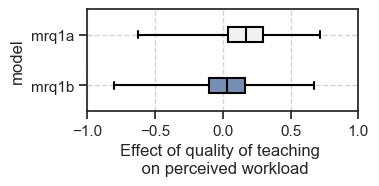

In [4]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)
palette = sns.color_palette("mako")
      
# Create a dataframe with a_C values
data_b_t = pd.concat([model_mrq1a[['b_t','model']], 
                      model_mrq1b[['b_t','model']]],
                     ignore_index=True)

total_palette = sns.color_palette("light:b")
# Create a palette dictionary matching the model names in the data
palette = [total_palette[0], total_palette[4]]

# Plot values
ploto.plot_pretty_boxplot(data_b_t, "b_t", "b_t_real", -1, 1, 'Effect of quality of teaching \n on perceived workload', palette)



In [5]:
def plot_pretty_boxplot_multivar(dataframe, filename, xdown, xup, label, palette):
      
      import seaborn as sns
      import matplotlib.pyplot as plt

      # Initialize the figure
      f, ax = plt.subplots(figsize=(3.5, 7))

      # Add in points to show each observation
      # sns.stripplot(data=dataframe, x=data_name, y="model",
      #            size=0.5, color=".3", linewidth=0)
      
      # Plot the parameter values with horizontal boxes
      sns.boxplot(data=dataframe, orient="h", whis=[0, 100], width=.3, palette=palette,
        whiskerprops=dict(color="black"),
        boxprops=dict(edgecolor='black'),
        capprops=dict(color="black"),
        medianprops=dict(color="black"))
      
      ax.set_xlim(xdown, xup)
      
      plt.grid("True")
      plt.subplots_adjust(bottom=0.3)
      plt.xlabel(label)
      plt.savefig(filename + '.pdf', format='pdf')

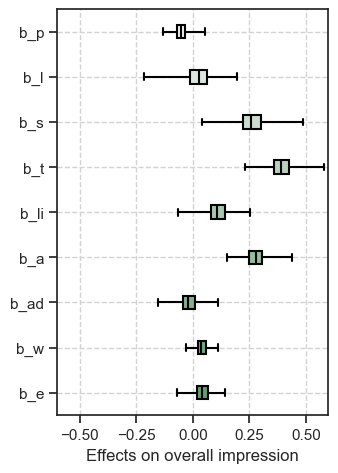

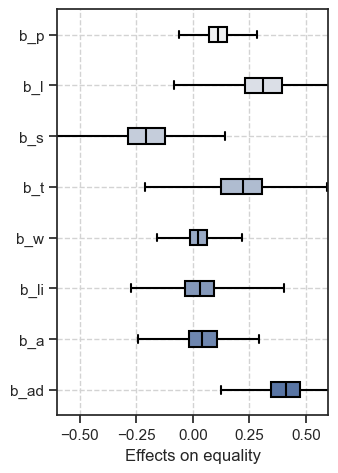

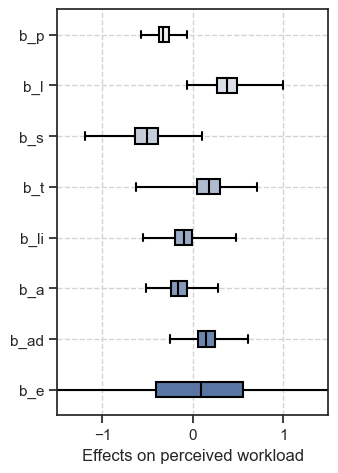

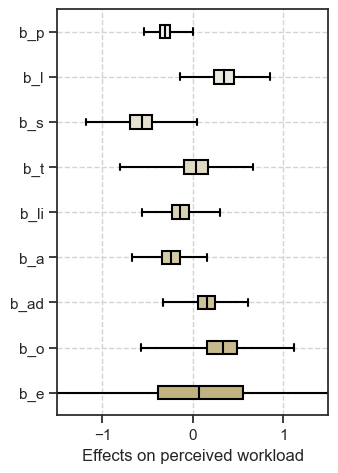

In [26]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_m1_subset = model_m1.drop(columns=["a", "sigma", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_m1_subset, "mrq1a", -0.6, 0.6, 'Effects on overall impression', "light:g")

model_mequality_new_subset = model_mequality_new.drop(columns=["a_0", "sigma", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_mequality_new_subset, "mteach", -0.6, 0.6, 'Effects on equality', "light:b")

model_mrq1a_subset = model_mrq1a.drop(columns=["a_0", "sigma", "model"])
#model_mrq1a_subset.columns = ["Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Inequality"]
plot_pretty_boxplot_multivar(model_mrq1a_subset, "mrq1a", -1.5, 1.5, 'Effects on perceived workload', "light:b")

model_mrq1b_subset = model_mrq1b.drop(columns=["a_0", "a_o", "sigma", "tau", "model"])
model_mrq1b_subset = model_mrq1b_subset.iloc[:, :9]
#model_mrq1b_subset.columns = ["Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Inequality", "Overall Impression"]
plot_pretty_boxplot_multivar(model_mrq1b_subset, "mrq1b", -1.5, 1.5, 'Effects on perceived workload', "light:y")
